<a href="https://colab.research.google.com/github/fco-parga/MNA-2023-September_Advanced_Machine_Learning_Methods/blob/activity_3b/Activity%203b%20-%20Text%20Classification%20using%20RNNs%20and%20AG_NEWS%20dataset%20in%20PyTorch/TC5033_Activity3b_ID18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


### Team members

- Francisco Javier Parga García A01794380
- Matthias Sibrian Illescas A01794249
- Enrique Hernández García A01793727
- Alejandro Tomás Mackey A01164338

### Import libraries

In this section, we will set up the Jupyter Notebook environment and install the required packages and dependencies.

In [1]:
# conda install -c pytorch torchtext
# conda install -c pytorch torchdata
# conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In addition to the previous package installations, we will also install the `scikit-plot` package.

In [2]:
#!pip install scikit-plot -q

We will also install the `portalocker` package, which was needed to be included in the installation process.

In [3]:
#!pip install portalocker -q

In this section, we list the essential libraries required to run the code. These libraries are necessary for data processing, machine learning, and visualization tasks.

In [4]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc

We will determine and print the device that will be used for computation, based on the availability of a GPU. In this case, we had access to CUDA resources, which were used by PyTorch.

In [5]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

We will perform a conversion of class labels in the dataset so that the value '0' is considered as the first class label. Basically, we carried out a shift of the class labels.

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In this section, we load and prepare the AG_NEWS dataset for our analysis.

In [6]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

We will obtain a tokenizer object and define a function to yield tokens from the dataset.

In [7]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

Now, we built the vocabulary from the tokens in the training dataset.

In [8]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

Let's test the tokenization and vocabulary by processing a sample text. As seen on the output, we get as a result, a list of the tokenized phrase.

In [9]:
#test tokens
tokens = tokeniser('Welcome to TE3007')
print(tokens, vocab(tokens))

['welcome', 'to', 'te3007'] [3314, 4, 0]


We define constants to specify the training and validation dataset sizes. We reserve 10% of the dataset for validation.

In [10]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

We split the training dataset into training and validation subsets to facilitate model training and evaluation.

In [11]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

Let's print the sizes of the training, validation, and test datasets.

In [12]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


Let's take a look at the first item in the training dataset to get a sense of the data's structure.

In [13]:
train_dataset[0]

(2,
 'Cardinals BCS-worthy,  #39;Canes under the radar Heading into the Orange Bowl to take on Miami is not easy for any team, especially on a Thursday night, but expect the athleticism and experience of the Louisville Cardinals to make tonight #39;s game very competitive.')

Also, we can check the first item in the test dataset. Both of them show a complete text of the dataset in each item.

In [14]:
test_dataset[0]

(3,
 "Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.")

We define a function, `collate_batch`, which is used by the DataLoader to process a batch of data. This function handles tokenization, padding, and label preparation.

In [15]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

We define constants and labels that will be used in the data processing and model training.

In [16]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

We create data loaders for the training, validation, and test datasets to facilitate batch processing.

In [17]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

#### Measuring the sentences length

In this section, we define a function to plot the distribution of sentence lengths in the training dataset.

In [18]:
import nltk
from tqdm import tqdm
import matplotlib.pyplot as plt

def plot_sentence_lengths(train_dataset):
    # initialize an empty list to store sentence lengths
    sentence_lengths = []
    # loop over the train_dataset
    for _, text in tqdm(train_dataset):
    # split the text into sentences
        sentences = nltk.sent_tokenize(text)
        # loop over the sentences
        for sentence in sentences:
          # append the length to the list
          sentence_lengths.append(len(sentence))
    
    print('Sentence average length: ', np.array(sentence_lengths).mean())
    # plot a histogram of the sentence lengths
    plt.hist(sentence_lengths, bins=37)
    plt.xlabel('Sentence length')
    plt.ylabel('Frequency')
    plt.title('Histogram of sentence lengths in train_dataset')
    plt.show()

In this section, we define a function to plot the distribution of sentence lengths in the training dataset.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108000/108000 [00:02<00:00, 41377.53it/s]


Sentence average length:  178.656321855196


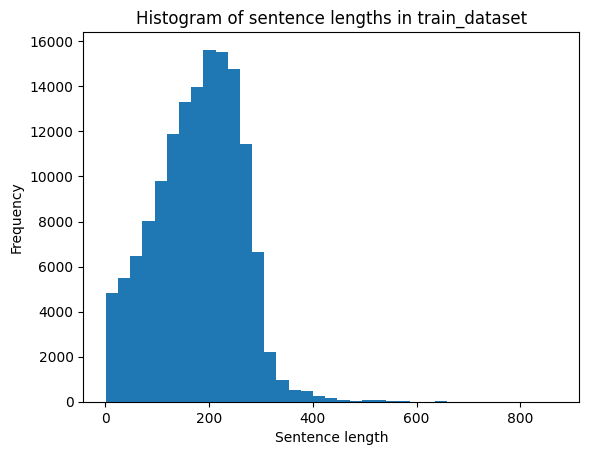

In [19]:
plot_sentence_lengths(train_dataset)

#### RNN model class

We define the configuration parameters for the model.

In [20]:
EMBEDDING_SIZE = 180 # From sentence length average
NEURONS = 100 # Number of neurons in the model
LAYERS = 2 # Number of layers in the model
NUM_CLASSES = 4 # ["World", "Sports", "Business", "Sci/Tech"]

We define a class, `RNN_Model_1`, that represents our Recurrent Neural Network (RNN) model for text classification.

In [21]:
class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        self.rnn = nn.GRU(input_size=embed_size,
                          hidden_size=hidden,
                          num_layers=layers,
                          batch_first=True)

        self.fc = nn.Linear(in_features=hidden,
                            out_features=num_classes)

    def forward(self, x):
        # Get the word embeddings from the input indices
        x = self.embedding_layer(x)

        # Pass the embeddings through the GRU layer
        # We only need the last hidden state as the output
        _, h = self.rnn(x)

        # Reshape the hidden state to match the linear layer's input shape
        h = h[-1].view(-1, self.rnn.hidden_size)

        # Pass the hidden state through the linear layer and get the logits
        logits = self.fc(h)

        return logits

#### Accuracy Function

We define a function, `accuracy`, to compute the accuracy of a model's predictions on a given data loader.

In [22]:
def accuracy(model, loader):
    # Initialize the number of correct predictions and the total number of predictions
    num_correct = 0
    num_total = 0
    # Set the model to evaluation mode
    model.eval()
    # Move the model to the device (CPU or GPU)
    model = model.to(device=device)
    # Disable gradient computation to speed up the inference
    with torch.no_grad():
        # Loop over each batch of data in the loader
        for (xi, yi) in loader:
            # Move the input and output data to the device
            xi = xi.to(device=device, dtype = torch.long)
            yi = yi.to(device=device, dtype = torch.long)
            # Get the model's scores (logits) for each class
            scores = model(xi) #
            # Get the predicted class by finding the maximum score along the dimension 1
            _, pred = scores.max(dim=1)
            # Count how many predictions are correct by comparing them with the true labels
            num_correct += (pred == yi).sum()
            # Count the total number of predictions
            num_total += pred.size(0)
        # Return the accuracy as the ratio of correct predictions to total predictions
        return float(num_correct)/num_total

#### Training Function

We define a function, `train`, to train the model with the specified optimizer and number of epochs. This function also calculates and stores the cost and accuracy values for each epoch.

In [23]:
def train(model, optimizer, epochs=100):
    # Initialize two lists to store the cost and accuracy values for each epoch
    costo_list = []
    acc_list = []

    # Move the model to the device (CPU or GPU)
    model = model.to(device=device)
    # Loop over the number of epochs
    for epoch in range(epochs):
        # Loop over each batch of data in the training loader
        for i, (xi, yi) in enumerate(train_loader):
            # Set the model to training mode
            model.train()
            # Move the input and output data to the device
            xi = xi.to(device=device, dtype=torch.long)
            yi = yi.to(device=device, dtype=torch.long)

            # Zero out the gradients of the optimizer
            optimizer.zero_grad()
            # Get the model's scores (logits) for each class
            scores = model(xi)

            # Calculate the cross-entropy loss between the scores and the true labels
            cost = F.cross_entropy(input= scores, target=yi)

            # Compute the gradients of the loss with respect to the model's parameters
            cost.backward()
            # Update the model's parameters using the optimizer
            optimizer.step()

        # Calculate the accuracy of the model on the validation loader
        acc = accuracy(model, val_loader)

        # Append the cost and accuracy values to the respective lists
        costo_list.append(cost.tolist())
        acc_list.append(acc)

        # Print the epoch number, cost value, and accuracy value
        print(f'Epoca {epoch}, costo: {np.round(cost.tolist(),4)}, accuracy: {np.round(acc,4)}')

    # Create a dictionary to store the cost and accuracy lists
    train_results = {'costo':costo_list, 'accuracy':acc_list}
    # Return the dictionary
    return train_results

### Train the model

We configure the model, optimizer, and set training parameters.

In [25]:
epochs = 7 # Number of training epochs
lr = 5e-4 # Learning rate
# instantiate model
gru_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
# Initialize the optimizer
optimiser = torch.optim.Adam(gru_model.parameters(), lr=lr)

Let's train the GRU model using the specified optimizer and number of epochs.

In [26]:
train_results_gru = train(gru_model, optimiser,  epochs=epochs)

Epoca 0, costo: 0.4244, accuracy: 0.8634
Epoca 1, costo: 0.2812, accuracy: 0.8878
Epoca 2, costo: 0.2272, accuracy: 0.8935
Epoca 3, costo: 0.2, accuracy: 0.9033
Epoca 4, costo: 0.1946, accuracy: 0.9039
Epoca 5, costo: 0.1626, accuracy: 0.9042
Epoca 6, costo: 0.1448, accuracy: 0.9049


Let's evaluate the accuracy of the trained GRU model on the test dataset and print the result.

In [27]:
print(f'{accuracy(gru_model, test_loader):.4f}')

0.9043


We define a function, `plot_training_results`, to visualize the training results, including the cost and accuracy over epochs.

In [28]:
def plot_training_results(train_results, y_range=(0,1)):

    # Convert the cost list to a NumPy array
    loss_arr = np.array(train_results['costo'])
    # Convert the accuracy list to a NumPy array
    acc_arr = np.array(train_results['accuracy'])

    # Plot the cost array with a label 'Cost'
    plt.plot(loss_arr, label = 'Cost')
    # Plot the accuracy array with a label 'Accuracy'
    plt.plot(acc_arr, label = 'Accuracy')
    # Create a legend for the plot
    plt.legend()

    # Get the current axes object of the plot
    axes = plt.gca()

    # Set the lower and upper limits of the y-axis to 0 and 1
    axes.set_ylim(y_range[0],y_range[1])
    # Set the label of the x-axis to 'Epoch' with a font size of 14
    axes.set_xlabel("Epoch", fontsize=14)
    # Set the label of the y-axis to 'Cost & Accuracy' with a font size of 14
    axes.set_ylabel("Cost & Accuracy", fontsize=14)
    # Set the title of the plot to 'Training Results' with a font size of 18
    axes.set_title('Training Results', fontsize=18)

    # Display the plot on the screen
    plt.show()

Let's visualize the training results of the GRU model, including the cost and accuracy over epochs.

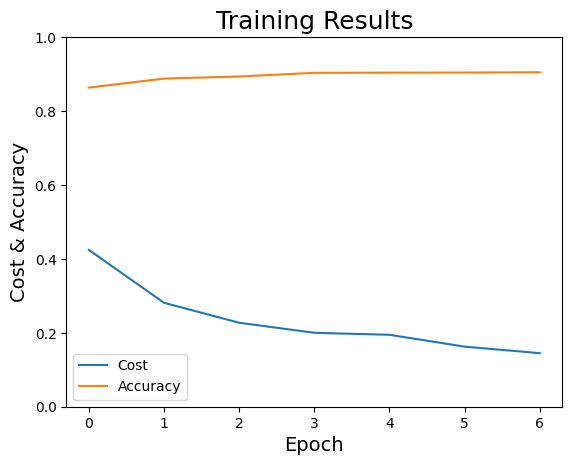

In [29]:
plot_training_results(train_results_gru, y_range=(0,1))

### Test the trained model

#### Sampling Function

We define a function, `sample_text`, to obtain predictions from a text classification model using a given data loader.

In [30]:
def sample_text(model, loader):
    # Initialize empty lists to store the predictions and labels
    preds_list = []
    labels_list = []

    # Loop over each batch of data in the loader
    for x, y in loader:
        # Move the input and output tensors to the device (CPU or GPU)
        x = x.to(device=device, dtype=torch.long)
        y = y.to(device=device, dtype=torch.long)

        # Pass the input tensor through the model and get the logits
        logits = model(x)

        # Find the index of the maximum logit for each sample and append it to the prediction list
        preds = torch.argmax(logits, dim=1)
        preds_list.append(preds)

        # Append the true labels to the label list
        labels_list.append(y)

    # Convert the prediction and label lists into tensors
    preds_tensor = torch.cat(preds_list)
    labels_tensor = torch.cat(labels_list)

    return labels_tensor, preds_tensor

Let's obtain predictions from the trained GRU model on the test dataset.

In [31]:
labels_tensor, preds_tensor = sample_text(gru_model, test_loader)

We use the `confusion_matrix` function from `sklearn.metrics` to compute the confusion matrix for the model's predictions.

In [32]:
# Import sklearn.metrics for confusion_matrix function
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_tensor.cpu().numpy(), preds_tensor.cpu().numpy())

Now we display the confusion matrix.

In [33]:
print(cm)

[[1709   47   70   74]
 [  24 1838   19   19]
 [  70   21 1584  225]
 [  53   25   80 1742]]


Let´s see the confusion matrix in a visualization that provides more information. As it can be seen in the following figure, the diagonal contains most of the observations, which confirms that the classification yielded favorable results.

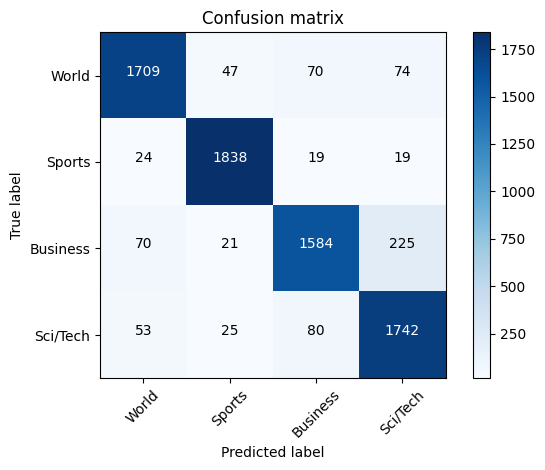

In [34]:
import itertools

# Plot the confusion matrix using imshow function
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add a title and labels for the axes
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add a colorbar to show the intensity of the values
plt.colorbar()

# Define the tick marks and labels for each axis
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Loop over the confusion matrix and add the values as text
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > cm.max() / 2 else "black")

# Adjust the layout to fit the plot
plt.tight_layout()

# Show the plot
plt.show()

### Conclusions

- The RNN model was built with an embedding size of 180, 2 layers of Gated Recurrent Unit (GRU) with 100 neurons each, and an output layer with 4 classes ("World", "Sports", "Business", "Sci/Tech") The choice of parameters, informed by an average sentence length of 180 for embeddings, was created to capture meaningful representations present.

- A Python function was defined that calculates the accuracy of a given PyTorch model on a specified data loader, which iterates through batches of data, moves them to the designated device (CPU or GPU), and computes the model's predictions. The accuracy is then determined by comparing the model's predictions with the true labels, providing a valuable metric for assessing the model's performance on the given dataset.

- For training, a function was defined which trains a model for 7 epochs using the Adam optimizer with a learning rate of 5e-4. The loss (cost) and accuracy for each epoch. During training, an accuracy value of > 0.9 was achieved by the fourth epoch. After training, the accuracy on the test dataset was evaluated, yielding a final accuracy of 0.9043. This indicates the model's ability to generalize well to unseen data, providing a reliable assessment of its performance.

- Afterwards, a sampling function was defined, named sample_text, which takes a PyTorch model and a data loader as input and performs inference on the dataset. It iterates through batches of data, moves them to the specified device (CPU or GPU), and obtains model predictions and the true labels into tensors, which were used to get the confusion matrix.

- To assess the classification results, a function was created to see a confusion matrix, which aids in assessing the model's performance by illustrating the distribution of predictions across different classes. The results show a diagonal with most of the samples being present there, which further confirms an adequate performance of the classifications done with the 'test' loader observations.